In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [2]:
df = pd.read_csv("/mnt/c/Users/User/Documents/GitHub/Last-Mile-206/datasets/consolidated.csv")

In [4]:
# Filling NAN values and other unsupported types
df = df.fillna(0)
df = df.replace(to_replace = '--', value = 0)
# Using the Carbon Emissions by country (kilo tonnes per capita), the top 16 offenders were chosen
country_codes = [137, 88, 11, 183, 144, 97, 185, 30, 8, 126, 83, 179, 140, 86, 149, 119]


In [5]:
# Building a list of facotrs (average) that might be a direct effect of CO2 emissions
co2_emissions = []
for itr in country_codes:
    # CO2 Emissions by country
    co2_country = df.loc[itr, '1980':'2016']
    sum_co2_country = co2_country.sum()
    avg_co2_country = sum_co2_country/len(co2_country)
    # GDP Const
    sum_gdp_const_country = 0.0
    gdp_const_country = df.loc[itr, 'gdp_const_1980':'gdp_const_2016']
    for seriesData in gdp_const_country:
        sum_gdp_const_country += float(str(seriesData).replace(',',''))
    avg_gdp_const_country = sum_gdp_const_country/len(gdp_const_country)
    # GDP Curr
    sum_gdp_curr_country = 0.0
    gdp_curr_country = df.loc[itr, 'gdp_curr_1980':'gdp_curr_2016']
    for seriesData in gdp_curr_country:
        sum_gdp_curr_country += float(str(seriesData).replace(',',''))
    avg_gdp_curr_country = sum_gdp_curr_country/len(gdp_curr_country)
    # Average Inflation
    sum_infl_avg_prices_country = 0.0
    infl_avg_prices_country = df.loc[itr, 'infl_avg_prices_1980':'infl_avg_prices_2016']
    for seriesData in infl_avg_prices_country:
        sum_infl_avg_prices_country += float(str(seriesData).replace(',',''))
    avg_infl_avg_prices_country = sum_infl_avg_prices_country/len(infl_avg_prices_country)
    # Unemployment
    sum_unemployment_country = 0.0
    unemployment_country = df.loc[itr, 'unemployment_1980':'unemployment_2016']
    for seriesData in unemployment_country:
        sum_unemployment_country += float(str(seriesData).replace(',',''))
    avg_unemployment_country = sum_unemployment_country/len(unemployment_country)
    # Acc Balance
    sum_acc_bal_country = 0.0
    acc_bal_country = df.loc[itr, 'acc_bal_1980':'acc_bal_2016']
    for seriesData in acc_bal_country:
        sum_acc_bal_country += float(str(seriesData).replace(',',''))
    avg_acc_bal_country = sum_acc_bal_country/len(acc_bal_country)
    # Consolidating the results
    co2_emissions.append([itr, avg_co2_country, avg_gdp_const_country, avg_gdp_curr_country, avg_infl_avg_prices_country, avg_unemployment_country, avg_acc_bal_country])

In [6]:
# Converting the list to a Dataframe
co2_emissions_df = pd.DataFrame(co2_emissions, columns = ['country_code', 'avg_co2', 'avg_gdp_const', 'avg_gdp_curr', 'avg_infl_prices', 'avg_unemployment', 'avg_acc_bal'])

In [18]:
x_train = co2_emissions_df.iloc[:, 2:7].copy()
print(x_train)

    avg_gdp_const  avg_gdp_curr  avg_infl_prices  avg_unemployment  \
0        5.951595     93.792135         3.749595          0.000000   
1        3.513514    134.247108         3.453108          1.308270   
2        4.265514     27.222054         1.810270          1.076135   
3        3.701000    277.183108         4.161865          0.000000   
4        2.258973    788.697189         1.234973          2.648892   
5        4.108216     27.218973         2.939081          3.221676   
6        2.644243   9767.411351         3.313054          6.379730   
7        2.383108    890.925946         3.239243          8.380649   
8        3.172973    568.144324         4.227135          6.958324   
9        5.409649     78.568811         2.006081          0.000000   
10       2.454595    154.352568        93.487595          5.239405   
11       4.899162     23.141486       191.570459          0.000000   
12       1.142649   1668.583243        47.359459          5.212324   
13       6.378676   

In [23]:
y_train = co2_emissions_df.iloc[:, 1].copy()
print(type(y_train))

&lt;class &#39;pandas.core.series.Series&#39;&gt;


In [30]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestRegressor())

In [31]:
print(sel.get_support())

[False False  True False  True]


In [37]:
selected_feat= x_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

2
Index([&#39;avg_infl_prices&#39;, &#39;avg_acc_bal&#39;], dtype=&#39;object&#39;)


&lt;AxesSubplot:&gt;

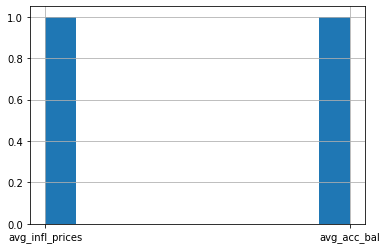

In [38]:
pd.Series(selected_feat).hist()